# Crop and Weed Classification : Convolutional Neural Network (CNN)

#### Step1 Importing Libraries:
This cell imports the necessary libraries for the project, including libraries for data manipulation, image processing, plotting, and TensorFlow/Keras for building and training the CNN model.

#### Explanation jsut for basic help:
- `os`: Provides functions for interacting with the operating system.
- `cv2`: OpenCV library for image processing.
- `numpy`: Library for numerical computations.
- `matplotlib.pyplot`: Library for plotting graphs and images.
- `sklearn.model_selection`: Provides functions for splitting datasets into training and validation sets.
- `tensorflow` and `tensorflow.keras`: TensorFlow and Keras libraries for building and training deep learning models.


In [1]:
# Importing necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import math


# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras import layers, models

# Setting random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


#### STEP 2 Loading Dataset:
This cell defines the data directory and loads the classes from the `classes.txt` file.

#### Explanation:
- `data_dir`: Path to the directory containing the dataset.
- `classes_file`: Path to the file containing class names.
- The classes are loaded from the `classes.txt` file and stored in the `classes` list.


In [2]:
# Define data directory and classes file
data_dir = "data"
classes_file = "classes.txt"

# Load classes from classes.txt
with open(classes_file, "r") as f:
    classes = f.read().splitlines()

# Print classes
print("Classes:", classes)


Classes: ['crop', 'weed']


#### Step 3 Loading Dataset to Program Memory:
This cell loads the dataset, consisting of images and annotations, into memory.

#### Explanation:
- The script iterates through files in the data directory to find image and annotation files.
- Image paths and annotations are stored in lists (`image_paths` and `annotations`, respectively).
- Sample image path and annotation are printed for verification.


In [3]:
# Initialize lists to store image paths and annotations
image_paths = []
annotations = []

# Iterate through files in the data directory
for filename in os.listdir(data_dir):
    if filename.endswith(".jpeg"):
        # Get image path
        image_path = os.path.join(data_dir, filename)
        image_paths.append(image_path)

        # Get annotation file path
        annotation_path = os.path.join(data_dir, filename.split(".")[0] + ".txt")

        # Read annotation
        with open(annotation_path, "r") as f:
            annotation = f.readline().strip()
            annotations.append(annotation)

# Check the number of images and annotations
print("Number of images:", len(image_paths))
print("Number of annotations:", len(annotations))

# Print sample image path and annotation
print("Sample image path:", image_paths[0])
print("Sample annotation:", annotations[0])


Number of images: 1300
Number of annotations: 1300
Sample image path: data\agri_0_1009.jpeg
Sample annotation: 1 0.608398 0.498047 0.541016 0.531250


#### Step 4 PreProcess Images:
This cell preprocesses the images and annotations from the dataset.

#### Explanation:
- A function `preprocess_image` is defined to read, resize, and normalize the images.
- Images are preprocessed using the `preprocess_image` function.
- Annotations are converted to numpy arrays.
- Shapes of preprocessed images and annotations are printed for verification.

In [4]:
# Define a function to preprocess images
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, (224, 224))  # Resize image to 224x224
    image = image / 255.0  # Normalize pixel values
    return image

# Preprocess images
images = [preprocess_image(image_path) for image_path in image_paths]

# Convert annotations to numpy array
annotations = np.array(annotations)

# Print shapes
print("Images shape:", np.array(images).shape)
print("Annotations shape:", annotations.shape)


Images shape: (1300, 224, 224, 3)
Annotations shape: (1300,)


#### Step 5: Visualize Preprocessed Images:
This cell visualizes a few preprocessed images from the dataset.

#### Explanation:
- A visualization function is used to display a grid of preprocessed images.
- Each image is accompanied by its corresponding class label.
- The visualization is helpful for verifying the preprocessing steps.


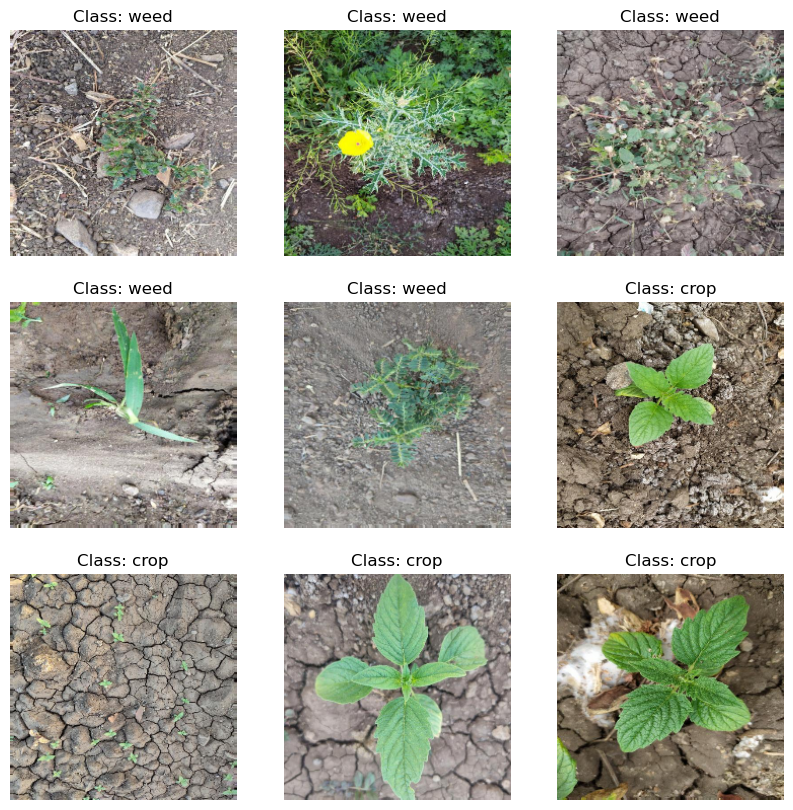

In [5]:
# Visualize preprocessed images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title("Class: " + classes[int(annotations[i].split()[0])])
    plt.axis("off")
plt.show()


#### Step 6: Split Dataset into Training and Validation Sets:
This cell splits the dataset into training and validation sets.

#### Explanation:
- The dataset is split into training and validation sets using the `train_test_split` function.
- Image paths and annotations are converted to numpy arrays.
- Shapes of training and validation sets are printed for verification.


In [6]:
# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, annotations, test_size=0.2, random_state=42)

# Convert annotations to numpy arrays
y_train = np.array([int(annotation.split()[0]) for annotation in y_train])
y_val = np.array([int(annotation.split()[0]) for annotation in y_val])

# Convert lists to numpy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)

# Print shapes
print("Training images shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation images shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)


Training images shape: (1040, 224, 224, 3)
Training labels shape: (1040,)
Validation images shape: (260, 224, 224, 3)
Validation labels shape: (260,)


#### Step 7: Build and Compile the CNN Model
:
This cell defines and compiles the Convolutional Neural Network (CNN) model.

#### Explanation:
- A sequential model with convolutional and dense layers is defined.
- The model is compiled with an optimizer, loss function, and evaluation metric.
- The model summary is printed to inspect the architecture and parameters.


In [7]:
# Define the CNN model architecture
model = models.Sequential([
    # Convolutional layer with 32 filters, each with a 3x3 kernel and ReLU activation function
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    # Max pooling layer with a 2x2 pool size
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional layer with 64 filters
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Max pooling layer with a 2x2 pool size
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional layer with 128 filters
    layers.Conv2D(128, (3, 3), activation='relu'),
    # Max pooling layer with a 2x2 pool size
    layers.MaxPooling2D((2, 2)),
    
    # Flatten layer to convert the 3D feature maps to a 1D feature vector
    layers.Flatten(),



    
    # Dense (fully connected) layer with 128 neurons and ReLU activation function
    layers.Dense(128, activation='relu'),
    
    # Output layer with softmax activation function for multi-class classification
    layers.Dense(len(classes), activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              # Use sparse categorical crossentropy for integer labels
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print
model.summary()


C:\Users\tanis\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

#### Step 8: Train the CNN Model
:
This cell trains the CNN model on the training data.

#### Explanation:
- The model is trained using the `fit` function with training data and validation data.
- Training progress is monitored, and the number of epochs is specified.
- Training loss and accuracy are printed for each epoch.


In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.4526 - loss: 2.1700 - val_accuracy: 0.5115 - val_loss: 0.7055
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.5065 - loss: 0.7046 - val_accuracy: 0.5115 - val_loss: 0.7091
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.5278 - loss: 0.6894 - val_accuracy: 0.5115 - val_loss: 0.7297
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.6318 - loss: 0.6305 - val_accuracy: 0.8269 - val_loss: 0.4960
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.8349 - loss: 0.4668 - val_accuracy: 0.7962 - val_loss: 0.6122
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.8148 - loss: 0.4643 - val_accuracy: 0.8615 - val_loss: 0.4479
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.8276 - loss: 0.4367 - val_accuracy: 0.8577 - val_loss: 0.4134
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.8445 - loss: 0.4147 - val_accuracy: 0.8423 - val_loss:

#### Step 9: Evaluate the Model
:
This cell evaluates the trained CNN model on the validation data.

#### Explanation:
- The model is evaluated on the validation data using the `evaluate` function.
- Validation loss and accuracy are printed to assess the model's performance.


In [9]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


Validation Loss: 0.39796894788742065
Validation Accuracy: 0.8730769157409668


#### Cell 10: Visualize Training History
:
This cell visualizes the training history of the CNN model.

#### Explanation:
- Training and validation accuracies are plotted over epochs.
- The plot helps in understanding the model's learning behavior and detecting overfitting or underfitting.


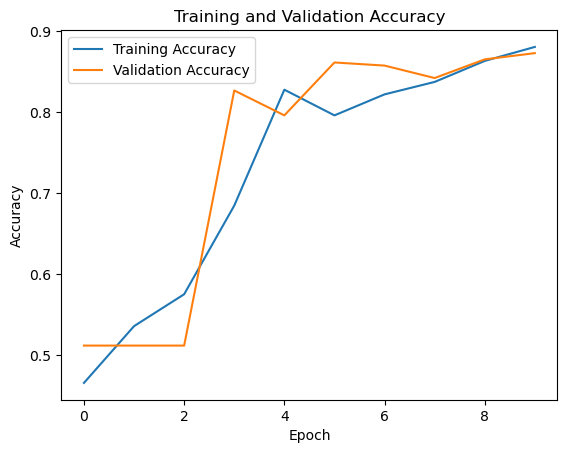

In [10]:
# Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


#### Step 11: Load and Preprocess Test Images:
This cell loads and preprocesses the test images for evaluation. 

what i basically did is i imported Some Images from another data set 
this doesnt have annotions txt files but instead had classes defined in the name of the file 
in test folder
crop_1.jpeg to crop_4.jpeg
weed_1.jpeg to weed_6.jpeg


#### Explanation:
- The test data directory is defined.
- Test image paths and actual classes are initialized.
- Test images are preprocessed using the `preprocess_image` function.
- Preprocessed test images are converted to a numpy array.
- Shapes of test images and actual classes are printed for verification.


In [11]:
# Define test data directory
test_dir = "test"

# Initialize lists to store test image paths and classes
test_image_paths = []
test_actual_classes = []

# Iterate through files in the test directory
for filename in os.listdir(test_dir):
    if filename.endswith(".jpeg"):
        # Get image path
        image_path = os.path.join(test_dir, filename)
        test_image_paths.append(image_path)

        # Extract actual class from the filename
        actual_class = filename.split("_")[0]
        test_actual_classes.append(actual_class)

# Preprocess test images
test_images = [preprocess_image(image_path) for image_path in test_image_paths]

# Convert lists to numpy arrays
test_images = np.array(test_images)

# Print shapes
print("Test images shape:", test_images.shape)
print("Actual classes:", test_actual_classes)


Test images shape: (18, 224, 224, 3)
Actual classes: ['crop', 'crop', 'crop', 'crop', 'crop', 'crop', 'crop', 'crop', 'weed', 'weed', 'weed', 'weed', 'weed', 'weed', 'weed', 'weed', 'weed', 'weed']


#### Cell 12: Make Predictions Using the Trained Model
it shows what the program has predicted for the images



In [12]:
# Make predictions using the trained model
predictions = model.predict(test_images)

# Convert predicted probabilities to class labels
predicted_classes = [classes[np.argmax(pred)] for pred in predictions]

# Print predicted classes
print("Predicted classes:", predicted_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
Predicted classes: ['crop', 'crop', 'crop', 'crop', 'weed', 'crop', 'weed', 'crop', 'weed', 'weed', 'weed', 'weed', 'weed', 'weed', 'weed', 'weed', 'weed', 'weed']


#### Step 13: Visualize Predictions



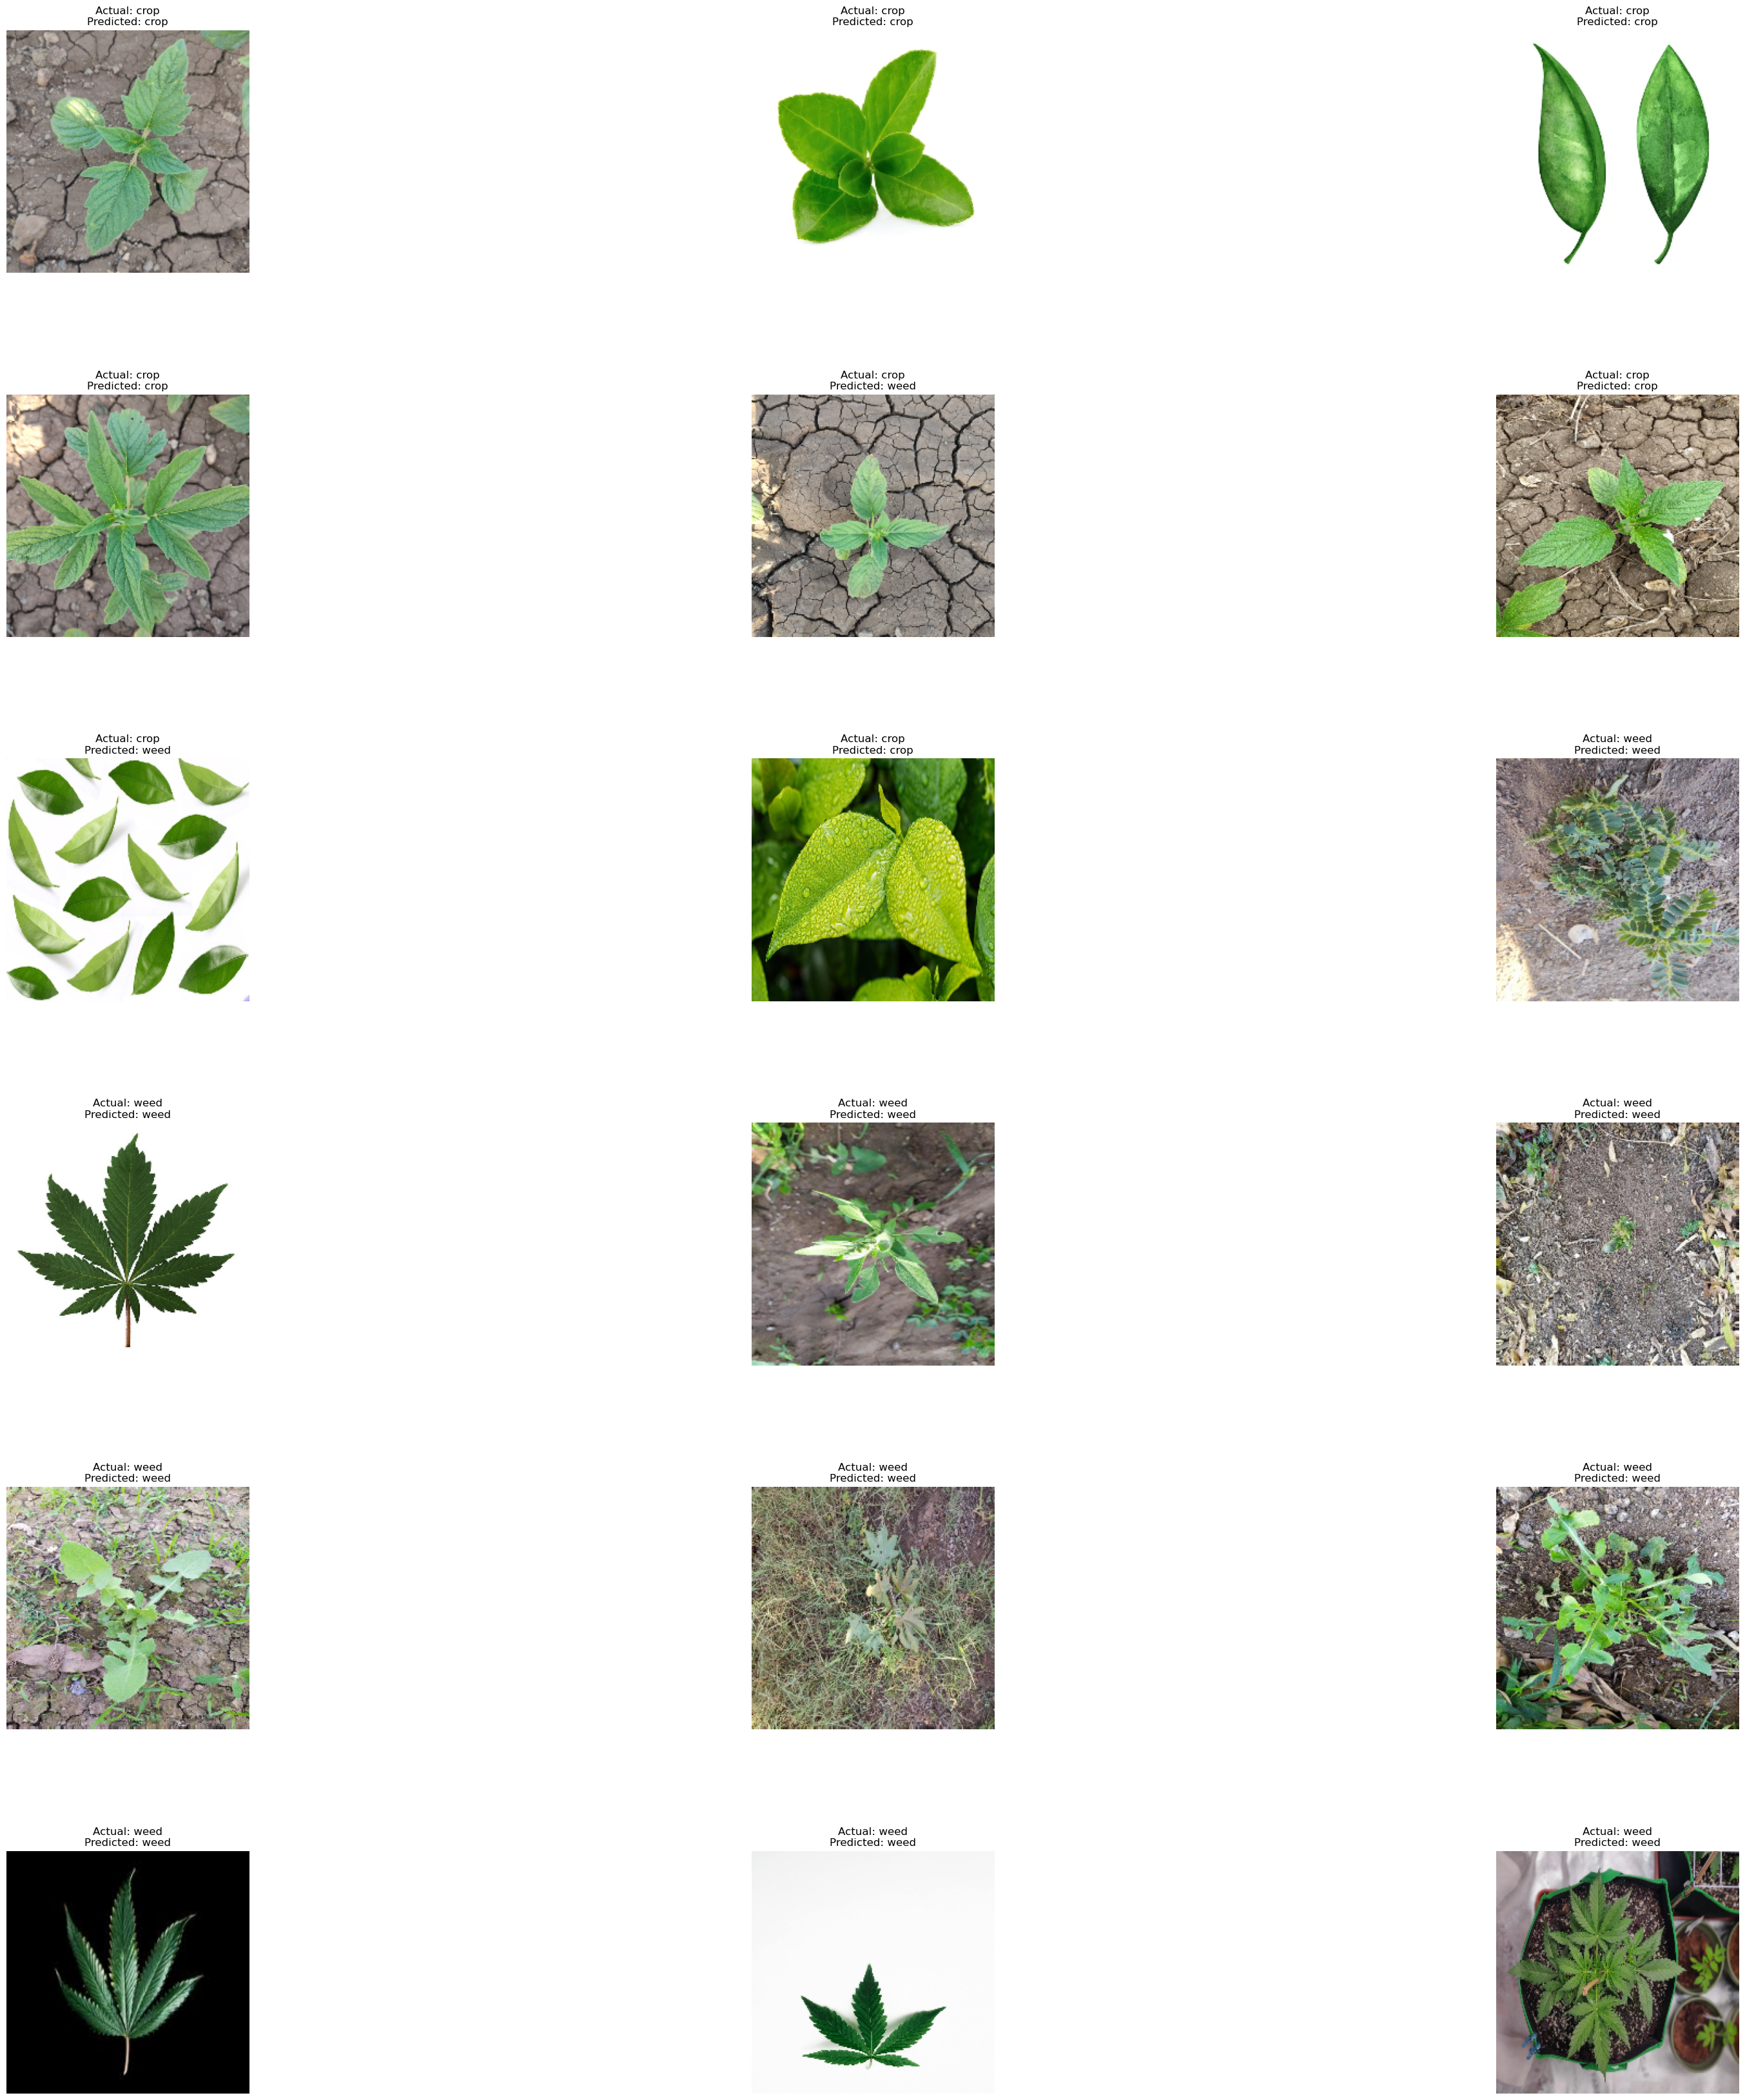

In [13]:

# Calculate the number of rows and columns for subplots
num_images = len(test_images)
num_rows = math.ceil(num_images / 3)
num_cols = min(num_images, 3)

# Define the size of the figure
figsize = (40, 40)

# Visualize test images and predictions
plt.figure(figsize=figsize)
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[i])
    plt.title("Actual: {}\nPredicted: {}".format(test_actual_classes[i], predicted_classes[i]))
    plt.axis("off")

# Adjust spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.5)

plt.show()
